<a href="https://colab.research.google.com/github/udayongky/notebook-data-science/blob/main/let_s_discover_more_about_the_olympic_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Tabular Data - Example Notebook

We are using dataset available on Kaggle by the name "120 years of Olympic history: athletes and results" .This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. The authors have scraped this data from www.sports-reference.com in May 2018. The R code they used to scrape and wrangle the data is on GitHub and I recommend to check their [kaggle kernel](https://www.kaggle.com/code/heesoo37/olympic-history-data-a-thorough-analysis/report).

The dataset can be found at this [link]()

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events).


# Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.graphics.gofplots as sm
from sklearn.preprocessing import PowerTransformer
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')

<Figure size 1440x720 with 0 Axes>

# Load the data

In [ ]:
data = pd.read_csv('athlete_events.csv')# replace with your path for dataset
regions = pd.read_csv('noc_regions.csv')# replace with your path for dataset

# Inspecting various attributes of imported data

Here we are basically just trying to get hang of our dataset before starting a more in depth analysis. If you can recall from the article, we are also computing the Descriptive statistics for the dataset.

In [ ]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
#Check for Nan Values and deal with them
for col in data.columns:
    num_nan = data[col].isna().sum()
    pct_nan = (num_nan / len(data)) * 100
    print(f"Column {col} has {num_nan} NaN values ({pct_nan:.2f}%).")

Column ID has 0 NaN values (0.00%).
Column Name has 0 NaN values (0.00%).
Column Sex has 0 NaN values (0.00%).
Column Age has 9474 NaN values (3.49%).
Column Height has 60171 NaN values (22.19%).
Column Weight has 62875 NaN values (23.19%).
Column Team has 0 NaN values (0.00%).
Column NOC has 0 NaN values (0.00%).
Column Games has 0 NaN values (0.00%).
Column Year has 0 NaN values (0.00%).
Column Season has 0 NaN values (0.00%).
Column City has 0 NaN values (0.00%).
Column Sport has 0 NaN values (0.00%).
Column Event has 0 NaN values (0.00%).
Column Medal has 231333 NaN values (85.33%).


We found out that the data is missing height and weight for a good praportion of participants. We can use various techniques such as interpolation, forward or backward fill, use Machine Learning to predict the missing information, or set a fixed value to fill the missiing values, but for the sake of simplicity we will just drop these rows.Note that how we deal with Nan values impact the results, so generally we experiment till we get our desired results. For example you might see slight differences between some plots in notebook and in the article, this is because those plots are generated using data where Nan Values were not dropped.
Also in case of medals column, it is safe to assume that Nan specifies that no medal was won

In [ ]:
data.dropna(subset=['Height','Weight','Age'], inplace=True)
# data['Height'].fillna(data['Height'].mean(), inplace=True)
# data['Weight'].fillna(data['Weight'].mean(), inplace=True)
# data['Age'].fillna(data['Age'].mean(), inplace=True)


In [ ]:
data.skew()

ID       -0.015114
Age       1.139644
Height    0.016901
Weight    0.792183
Year     -0.961373
dtype: float64

In [ ]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 271115
Data columns (total 15 columns):
ID        206165 non-null int64
Name      206165 non-null object
Sex       206165 non-null object
Age       206165 non-null float64
Height    206165 non-null float64
Weight    206165 non-null float64
Team      206165 non-null object
NOC       206165 non-null object
Games     206165 non-null object
Year      206165 non-null int64
Season    206165 non-null object
City      206165 non-null object
Sport     206165 non-null object
Event     206165 non-null object
Medal     30181 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 25.2+ MB


In [ ]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
for col in regions.columns:
    print(f"Column {col} has {regions[col].isna().sum()} NaN values.")

Column NOC has 0 NaN values.
Column region has 3 NaN values.
Column notes has 209 NaN values.


# 4. Joining the dataframes

Using the 'Merge' function from Pandas, we have the ability to combine the two dataframes by using the 'NOC' column as the key

In [ ]:
merged = pd.merge(data, regions, on='NOC', how='left')

Let's see the result:

In [ ]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# Graphical techniques


## Histogram

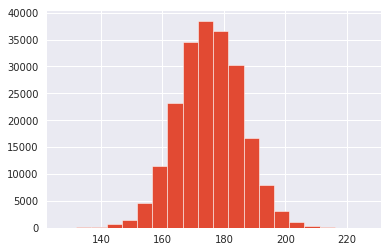

In [ ]:
merged.Height.hist(bins=20)

## Normal Probability Plot

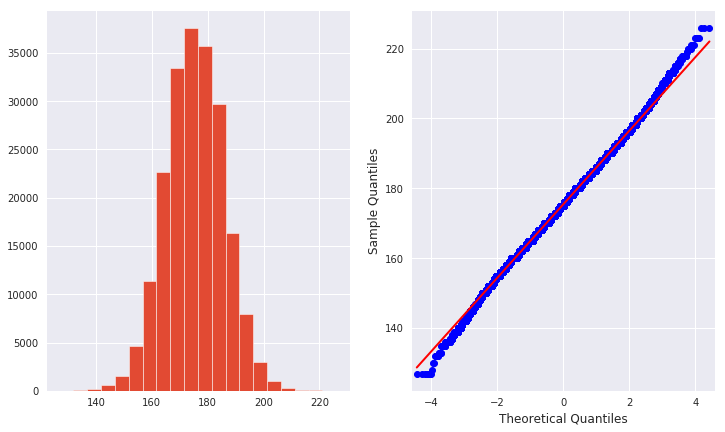

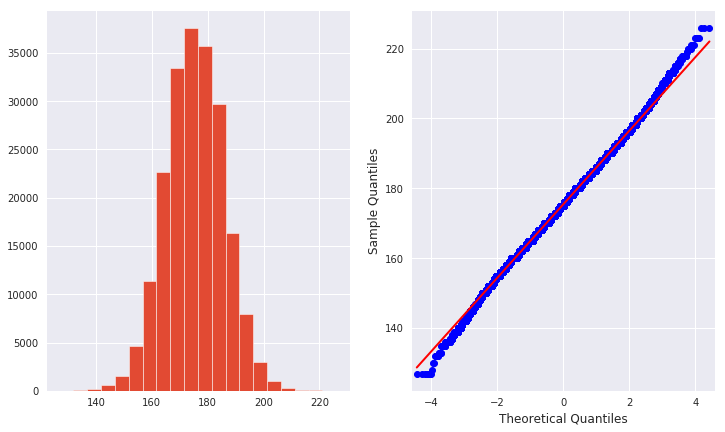

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
merged.Height.hist(bins=20,ax=ax[0])
sm.ProbPlot(merged.Height).qqplot(line='s', ax=ax[1])


## Kernel Distribution Estimation or KDE plot

In [ ]:
goldMedalsBasketball = merged[(merged.Medal == 'Gold')&(merged.Sport == 'Basketball')]
goldMedalsSwimming = merged[(merged.Medal == 'Gold')&(merged.Sport == 'Swimming')]

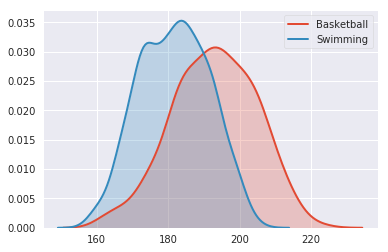

In [ ]:
sns.kdeplot(data=goldMedalsBasketball["Height"],shade=True,label="Basketball")
sns.kdeplot(data=goldMedalsSwimming["Height"],shade=True,label="Swimming")

## Pie chart

In [ ]:
goldMedals = merged[(merged.Medal == 'Gold')]
totalGoldMedals=goldMedals.region.value_counts().reset_index(name='Medal')

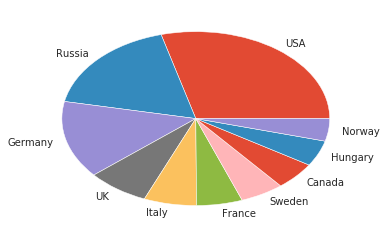

In [ ]:
plt.pie(x='Medal',labels="index",data=totalGoldMedals.head(10))
plt.show()

## Bar chart

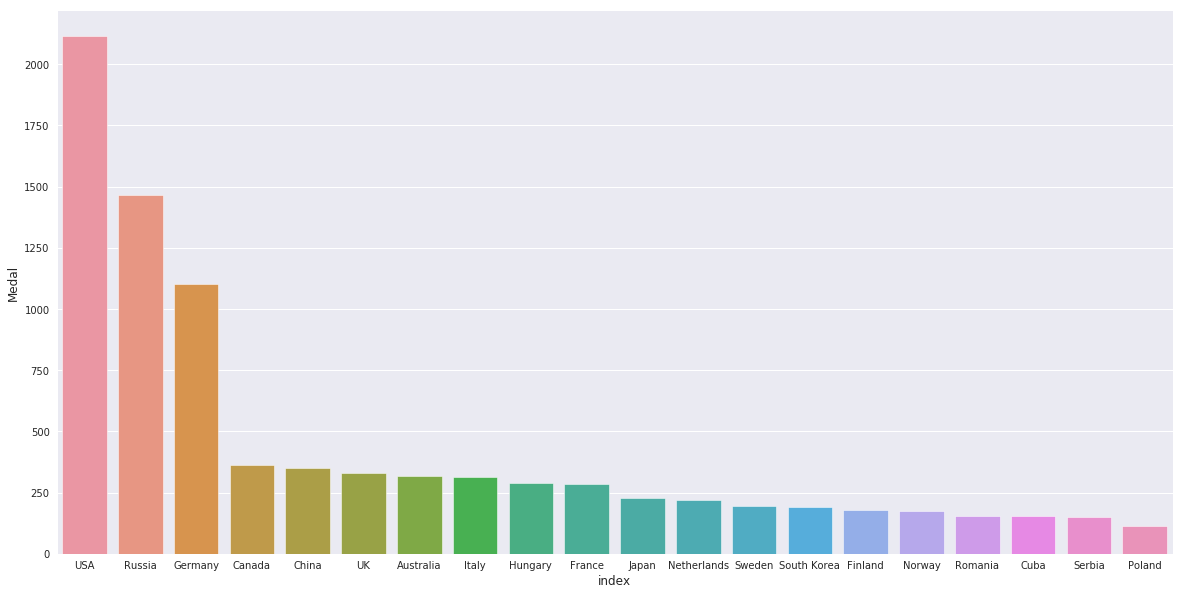

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='index',y="Medal",data=totalGoldMedals.head(20))

## Stacked bar chart

In [ ]:
SilverMedals = merged[(merged.Medal == 'Silver')]
bronzeMedals = merged[(merged.Medal == 'Bronze')]
goldMedals = merged[(merged.Medal == 'Gold')]
s=SilverMedals.region.value_counts().reset_index(name='Silver')
b=bronzeMedals.region.value_counts().reset_index(name='Bronze')
g=goldMedals.region.value_counts().reset_index(name='Gold')
medal_data=pd.merge(g,pd.merge(s,b)).head(20)

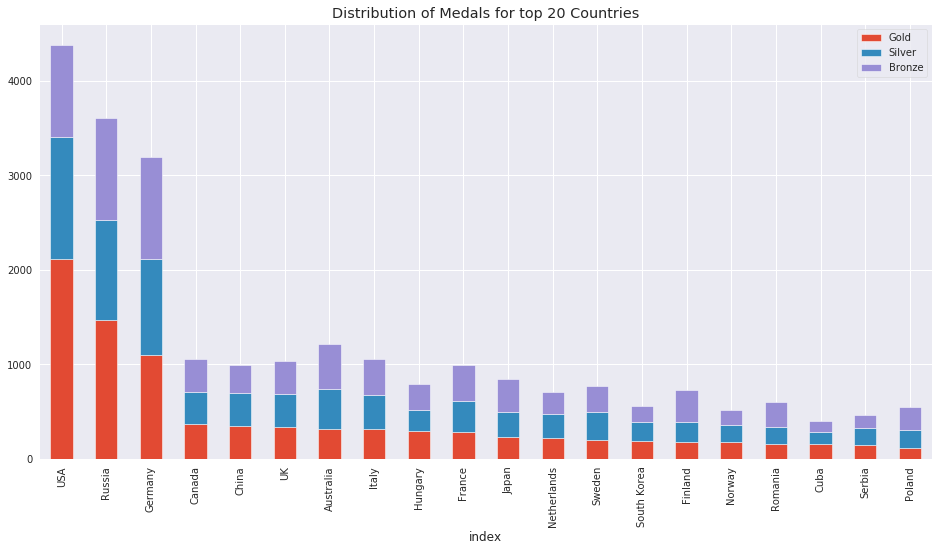

In [ ]:

medal_data.plot(x='index', kind='bar',stacked=True, title='Distribution of Medals for top 20 Countries',figsize=(16, 8))


## Line chart

Text(0.5,1,'Number of woman athletes per edition of the Games')

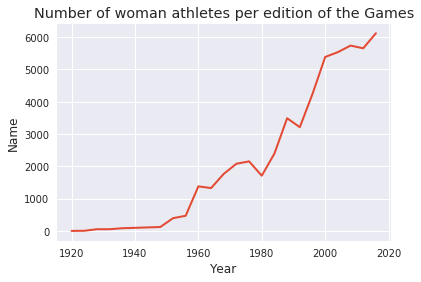

In [ ]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]
womencount=womenInOlympics.groupby(womenInOlympics.Year).count()
sns.lineplot(womencount.index,womencount.Name)
plt.title('Number of woman athletes per edition of the Games')

## Run Sequence plot

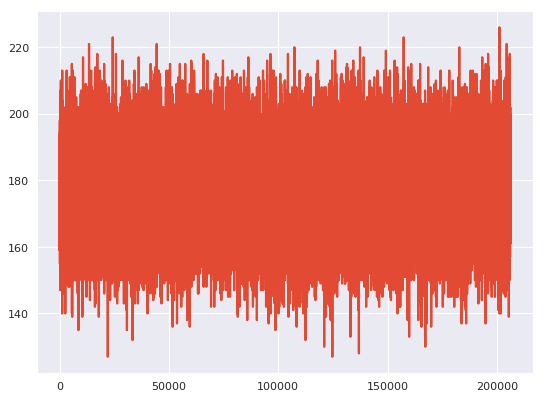

In [ ]:
figure(figsize=(8, 6), dpi=80)
merged.Height.plot()

## Area plot

In [ ]:
womenGold = merged[(merged.Sex == 'F') & (merged.Medal == 'Gold')& (merged.Season == 'Summer')]
menGold = merged[(merged.Sex == 'M') & (merged.Medal == 'Gold')& (merged.Season == 'Summer')]
womencount=womenGold.groupby(womenGold.Year).count()
mencount=menGold.groupby(menGold.Year).count()
x=pd.DataFrame(womencount.ID)
x=x.rename(columns={"ID": "Women"})
y=pd.DataFrame(mencount.ID)
y=y.rename(columns={"ID": "Men"})
NumberOfGold=x.join(y)


Text(0.5,1,'Medals won by woman in comparison with men per edition of the Games')

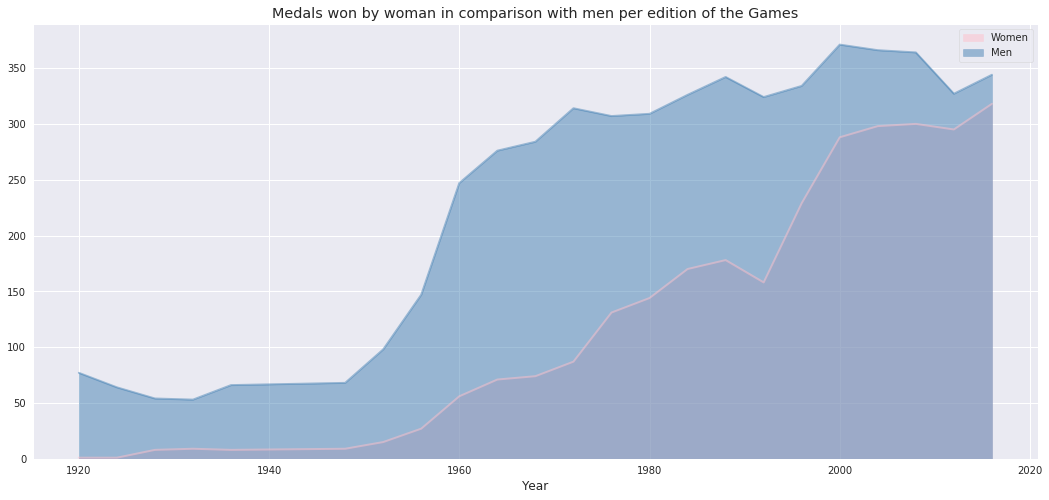

In [ ]:
NumberOfGold.plot.area(stacked=False,colors=['pink','steelblue'],figsize=(18, 8))
plt.title('Medals won by woman in comparison with men per edition of the Games')

## Box plot

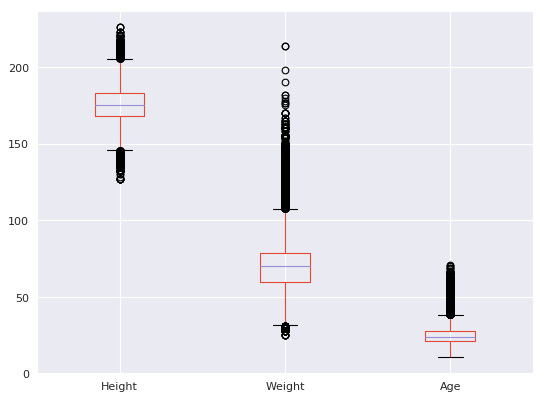

In [ ]:
figure(figsize=(8, 6), dpi=80)
merged.boxplot(column=['Height', 'Weight', 'Age'])

## Scatter plot

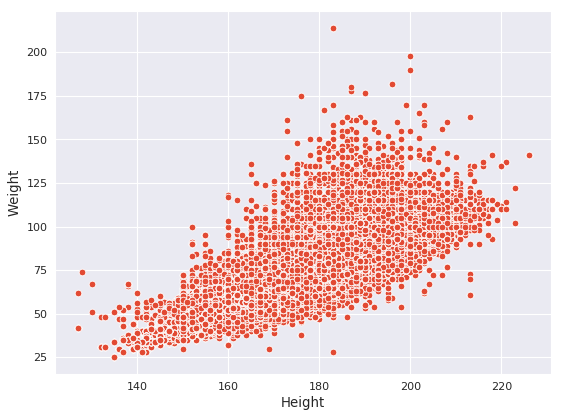

In [ ]:
figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x='Height',y='Weight',data=merged)

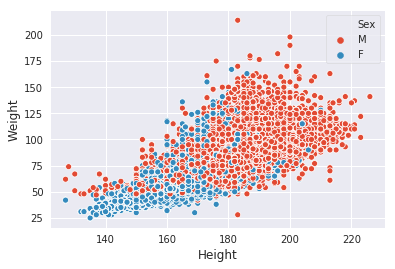

In [ ]:
sns.scatterplot(x='Height',y='Weight',hue="Sex",data=merged)

## Lag plot


In [ ]:
#shuffle dataset
merged=merged.sample(frac=1)

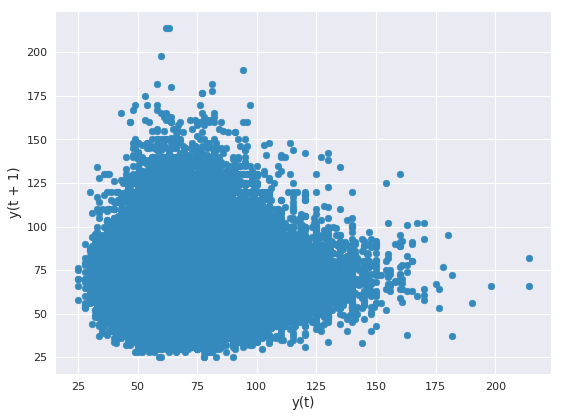

In [ ]:
figure(figsize=(8, 6), dpi=80)
pd.plotting.lag_plot(merged.Weight,lag=1)

## Pair plot

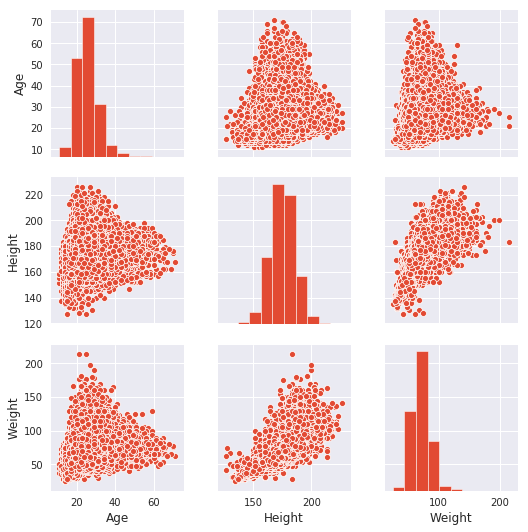

In [ ]:
sns.pairplot(merged[['Age','Height','Weight']])

## Heatmap

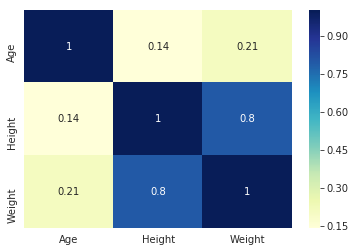

In [ ]:
sns.heatmap(merged[['Age','Height','Weight']].corr(), cmap="YlGnBu", annot=True)

# More Questions

We can use these or more such tehniques to find  answers for questions such as
1. Which countries have most and least number of Women gold medalist.
2. Is there any country where number of women who won medals are more than medals won by men of same country.
3. Which Country do most tallest athletes come from?

and many more...


## Which country has most and least number of Women gold medalist.

In [ ]:
womenGold = merged[(merged.Sex == 'F') & (merged.Medal == 'Gold')]
womenGold=womenGold.region.value_counts().reset_index(name='Medal')

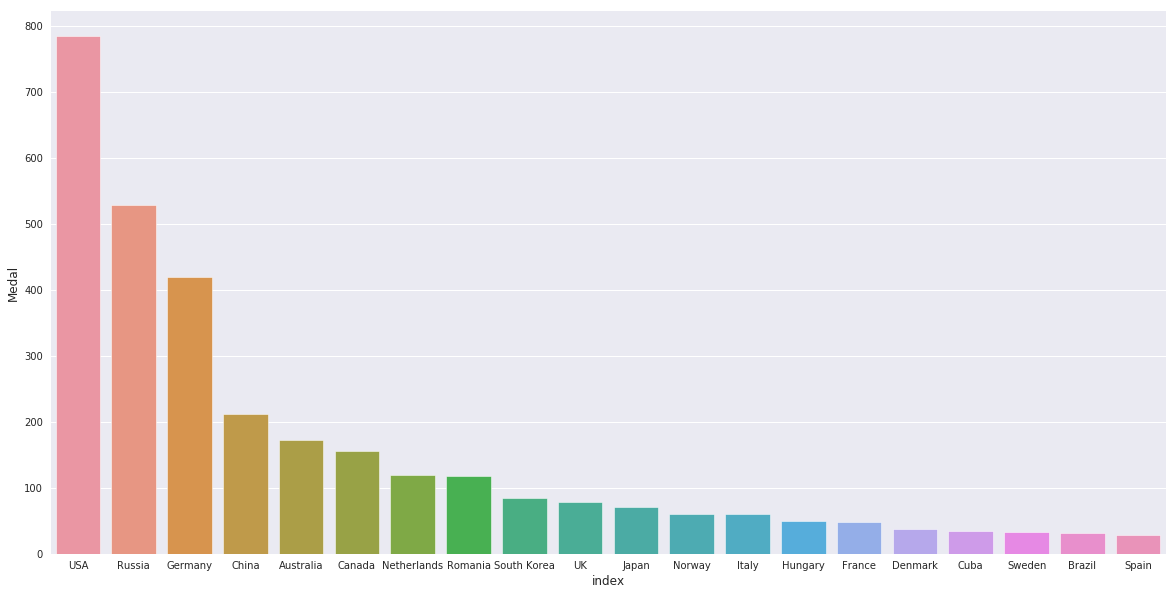

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='index',y="Medal",data=womenGold.head(20))
plt.title('Countries with most number of gold medalsits ')

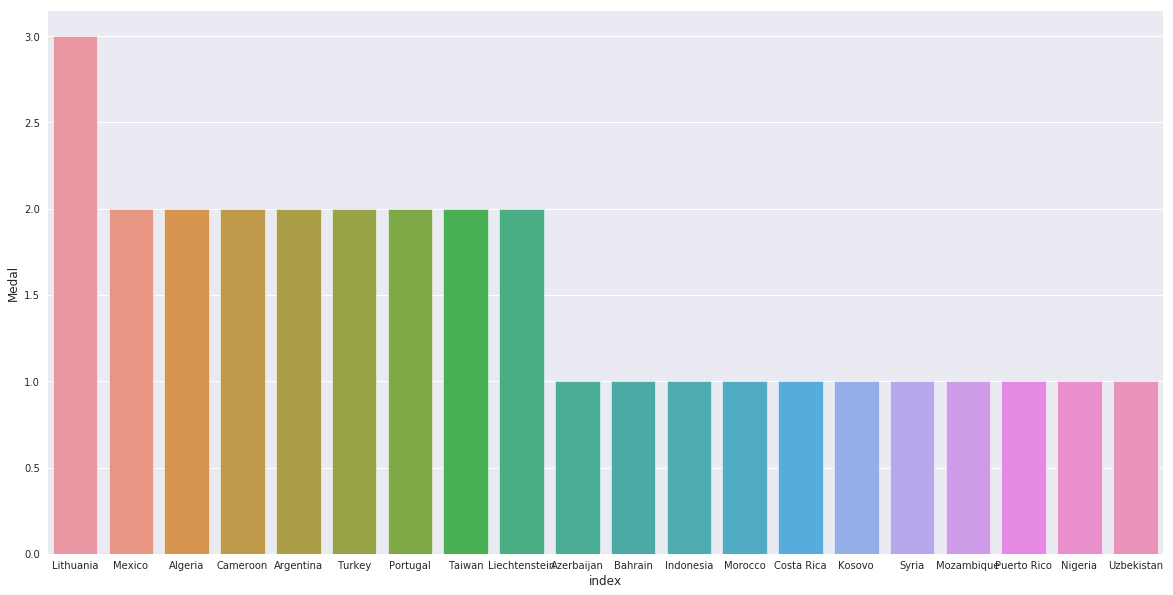

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='index',y="Medal",data=womenGold.tail(20))
plt.title('Countries with least number of gold medalsits ')

Try out the rest...